In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

## Task 1(a) Double Exposure

Number of images:  16
Original Image Size:  (4032, 3024, 3)
Resized Image Size:  (1024, 1024, 3)


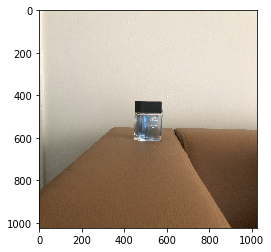

In [113]:
# Load all images
imgs_task1a = [cv2.imread(os.path.join('Images_task1a', img)) for img in sorted(os.listdir('Images_task1a')) if img.endswith('.jpg')]
print("Number of images: ", len(imgs_task1a))
print("Original Image Size: ", imgs_task1a[0].shape)

n_of_imgs = len(imgs_task1a)

# resize images to 1024x1024

imgs_task1a = [cv2.resize(img, (1024, 1024)) for img in imgs_task1a]
print("Resized Image Size: ", imgs_task1a[0].shape)

h = imgs_task1a[0].shape[0]
w = imgs_task1a[0].shape[1]
c = imgs_task1a[0].shape[2]

# Restore original color of the images

imgs_task1a = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs_task1a]

plt.imshow(imgs_task1a[2])

#### SNR without adding custom noise

In [152]:
# Calculate SNR of Individual Images
def calculate_snr(imgs):
    mean = np.array([np.mean(img) for img in imgs])
    std = np.array([np.std(img) for img in imgs])
    snrs = mean/std
    return snrs

# Calculate noise variance of images
def calculate_noise_variance(imgs):
    var = []
    for img in imgs:
        var.append(np.var(img))
    return np.average(var), var

# Scale Image
def scale_img(img):
    max_val = img.max()
    min_val = img.min()
    scaled_img = ((img - min_val)/(max_val - min_val)) * 255
    
    return scaled_img.astype(np.uint8)

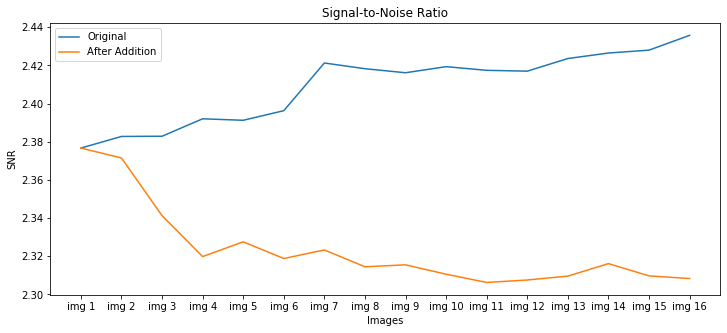

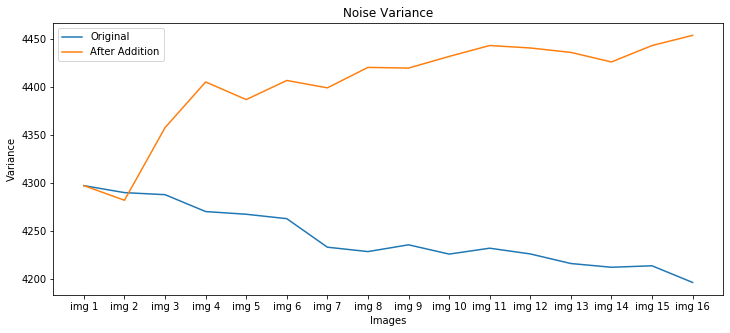

In [165]:
# Compute SNR of original images
original_snrs = calculate_snr(imgs_task1a)

xticks = ['img {}'.format(i + 1) for i in range(len(imgs_task1a))]

plt.figure(figsize=(12,5))

# Plot SNR of original images
plt.title('Signal-to-Noise Ratio')
plt.plot(original_snrs, label='Original')
plt.xlabel("Images")
plt.ylabel('SNR')
plt.xticks(ticks=list(range(len(imgs_task1a))), labels=xticks)


de_img = 0  # Final image after addition
new_imgs = [] # Store all images during iterative additions
for i,img in enumerate(imgs_task1a):
    de_img = np.add(de_img, img, dtype=np.long)
    new_imgs.append(scale_img(de_img))

# Compute SNR of the new images acquired through the iterative addition process

snrs_after_addition = calculate_snr(new_imgs)

plt.plot(snrs_after_addition, label='After Addition')
plt.legend()

# Compute Noise Variances of original and added images
avg_noise_var_o, noise_vars_o = calculate_noise_variance(imgs_task1a)
avg_noise_var_n, noise_vars_n = calculate_noise_variance(new_imgs)

plt.figure(figsize=(12,5))

# Plot Noise Variances of original and add images
plt.title('Noise Variance')
plt.plot(noise_vars_o, label='Original')
plt.xlabel("Images")
plt.ylabel('Variance')
plt.xticks(ticks=list(range(len(imgs_task1a))), labels=xticks)

plt.plot(noise_vars_n, label='After Addition')
plt.legend()

plt.figure()
labels = ['Original', 'After Addition']
plt.bar(labels, [avg_noise_var_o, avg_noise_var_n], color=['r', 'b'])
plt.ylabel('Avg Var')
plt.show()

In [116]:
plt.imshow(scale_img(de_img))

#### SNR with custom noise

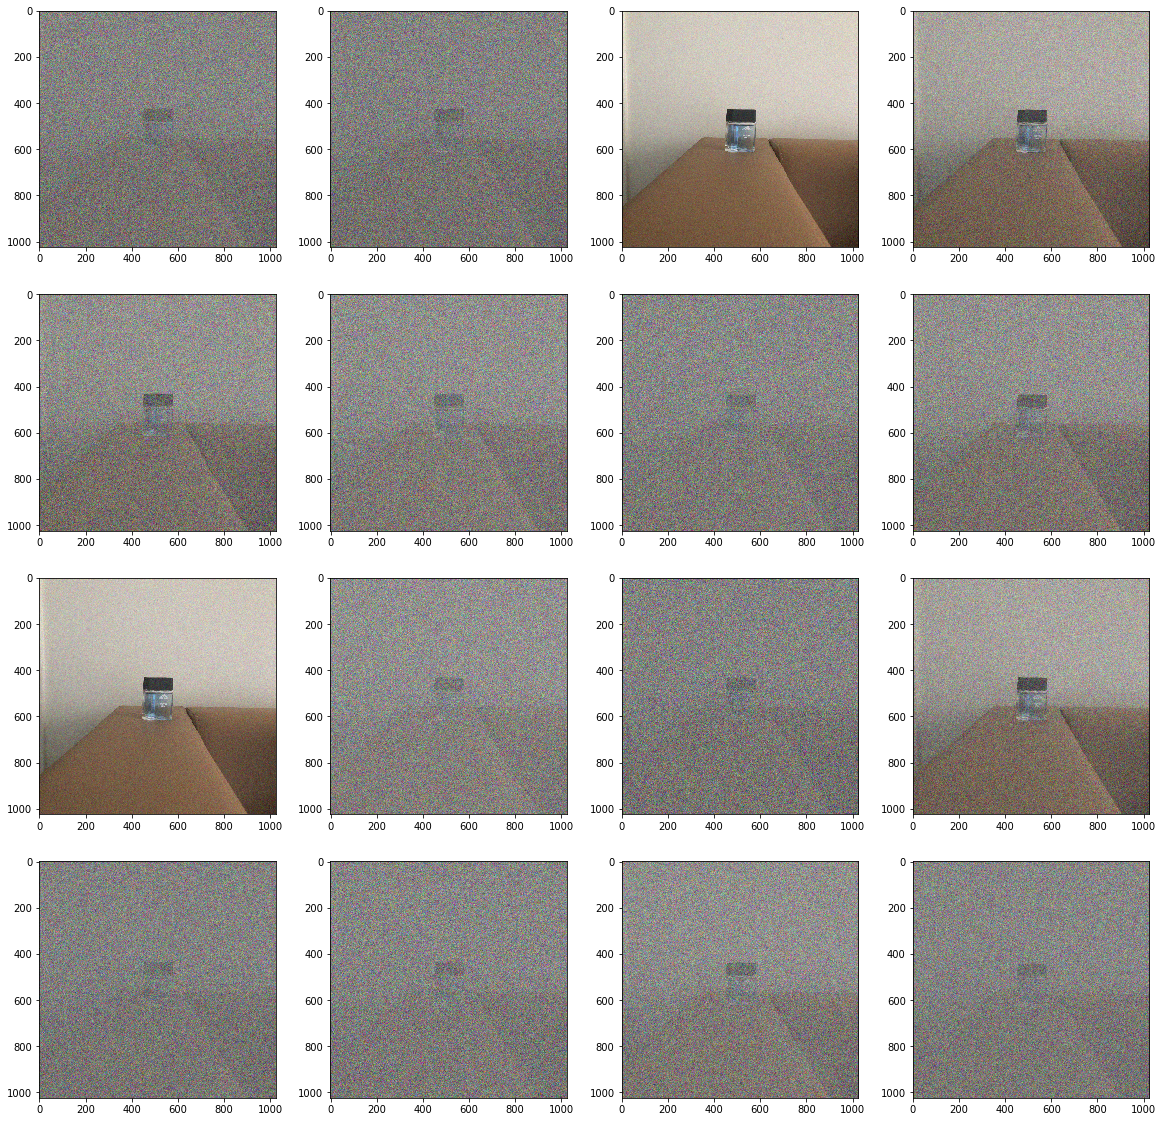

In [146]:
noise_means = np.random.rand(len(imgs_task1a))
noise_std = np.random.rand(len(imgs_task1a))

noisy_imgs = []

for mean, std, img in zip(noise_means, noise_std, imgs_task1a):
    noise = np.random.normal(mean, std, size=(h, w, c)) * 255
    n_img = np.add(img, noise, dtype=np.float32)
    noisy_imgs.append(n_img)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for img, ax in zip(noisy_imgs, axs.flatten()):
    ax.imshow(scale_img(img))

plt.show()

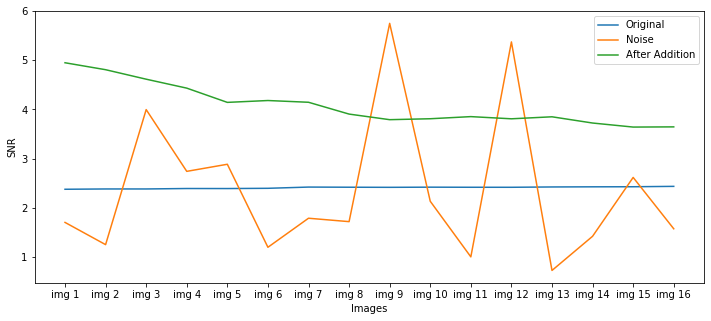

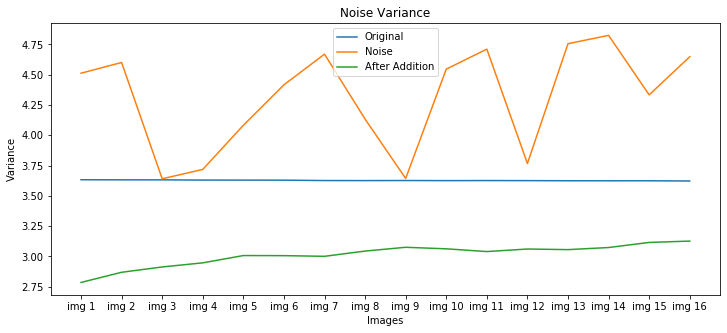

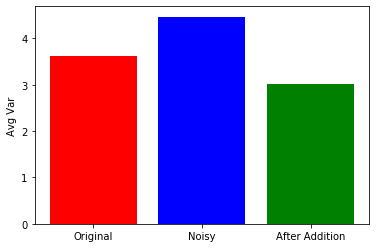

In [169]:
plt.figure(figsize=(12,5))

# Plot SNR of original images
plt.plot(original_snrs, label='Original')
plt.xlabel("Images")
plt.ylabel('SNR')
plt.xticks(ticks=list(range(len(imgs_task1a))), labels=xticks)

snrs_after_noise = calculate_snr(noisy_imgs)

plt.plot(snrs_after_noise, label='Noise')

de_img = 0  # Final image after addition
new_imgs = [] # Store all images during iterative additions
for i,img in enumerate(noisy_imgs):
    de_img = np.add(de_img, img, dtype=np.float64)
    new_imgs.append(scale_img(de_img))

# Compute SNR of the new images acquired through the iterative addition process

snrs_after_addition = calculate_snr(new_imgs)

plt.plot(snrs_after_addition, label='After Addition')
plt.legend()

# Compute Noise Variances of original and added images
avg_noise_var_o, noise_vars_o = calculate_noise_variance(imgs_task1a)
avg_noise_var_noisy, noise_vars_noisy = calculate_noise_variance(noisy_imgs)
avg_noise_var_new, noise_vars_new = calculate_noise_variance(new_imgs)

plt.figure(figsize=(12,5))

# Plot Noise Variances of original and add images
plt.title('Noise Variance')
plt.plot(np.log10(noise_vars_o), label='Original')
plt.xlabel("Images")
plt.ylabel('Variance')
plt.xticks(ticks=list(range(len(imgs_task1a))), labels=xticks)

plt.plot(np.log10(noise_vars_noisy), label='Noise')

plt.plot(np.log10(noise_vars_new), label='After Addition')
plt.legend()

plt.figure()
labels = ['Original', 'Noisy', 'After Addition']
plt.bar(labels, np.log10([avg_noise_var_o,  avg_noise_var_noisy, avg_noise_var_new]), color=['r', 'b', 'g'])
plt.ylabel('Avg Var')
plt.show()

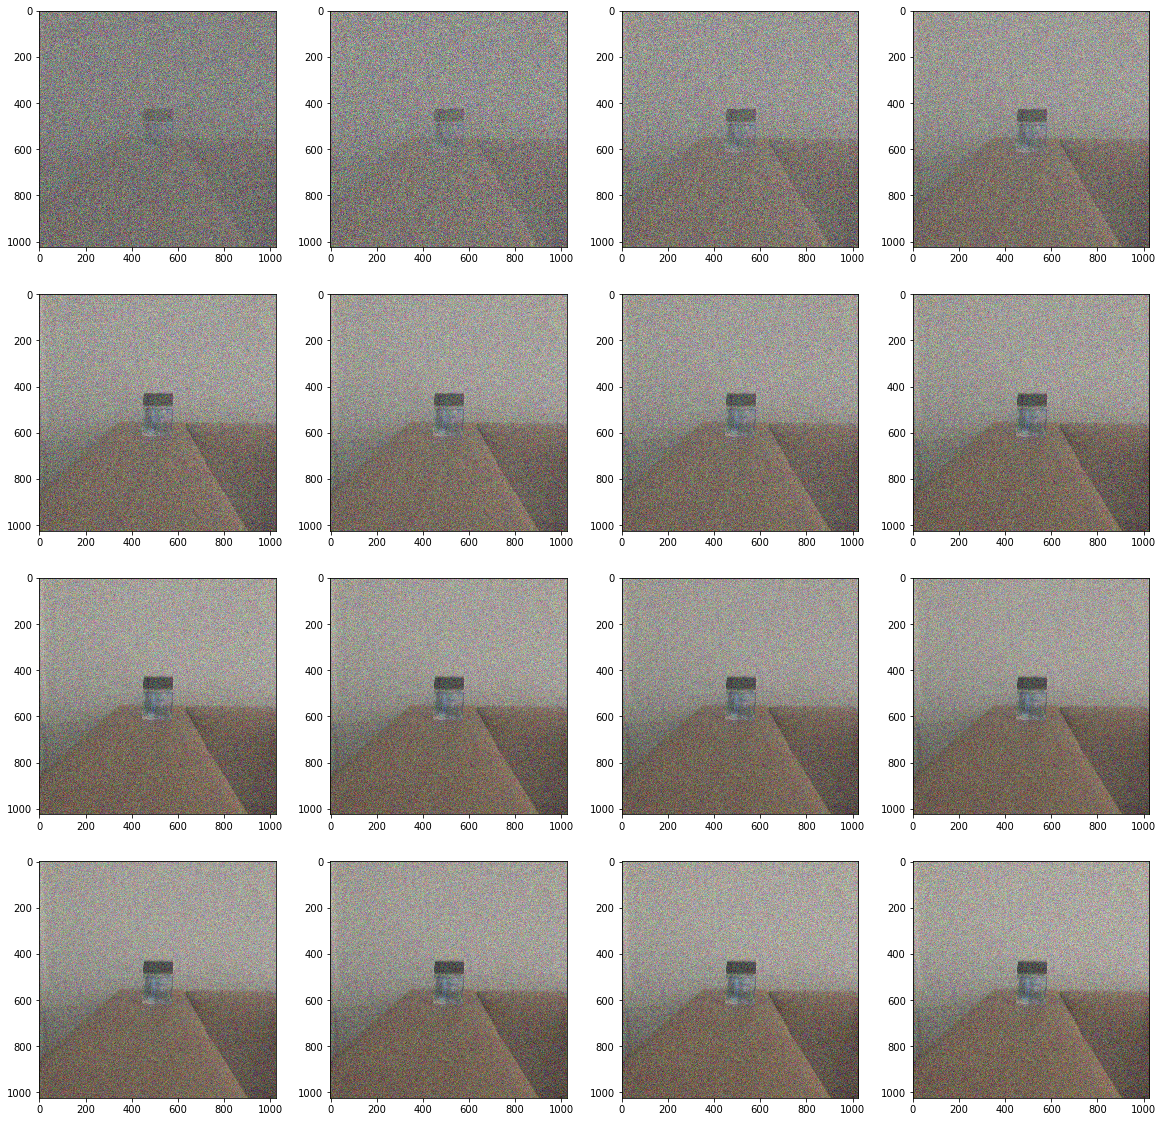

In [148]:
# Plot images after additions
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for img, ax in zip(new_imgs, axs.flatten()):
    ax.imshow(scale_img(img))

plt.show()

## Task (1b) Change Detection

In [177]:
diff_imgs = []
d_img = 0
for img in imgs_task1a:
    d_img = np.subtract(img, d_img, dtype=np.int)
    diff_imgs.append(d_img)
    d_img = img

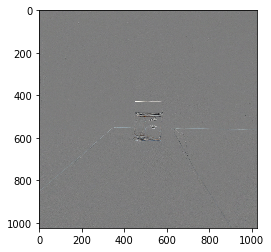

In [181]:
plt.imshow(scale_img(diff_imgs[3]))